# ДЗ №1.
## Подготовить для самостоятельно выбранного набора данных анализ различных гипотез, оформленный, как в виде написанного кода, так и в виде отчёта с аналитической человекопонятной частью

# Введение
Проведем анализ датасета, взятого с [Kaggle](https://www.kaggle.com/competitions/spaceship-titanic)



##Описание задачи

Космический корабль «Титаник» был межзвёздным пассажирским лайнером, запущенным месяц назад. На борту находилось почти 13 000 пассажиров, и судно отправилось в своё первое путешествие.

При прохождении около Альфы Центавра «Космический Титаник» столкнулся с пространственно-временной аномалией, скрытой в облаке пыли. Хотя корабль остался цел, почти половина пассажиров была перенесена в другое измерение! Чтобы помочь спасательным командам вернуть пропавших пассажиров, вам предлагается предсказать, какие пассажиры были перемещены аномалией, используя записи, восстановленные из повреждённой компьютерной системы корабля.

In [9]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
df = pd.read_csv("/content/train.csv")
print(df.shape)
df.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


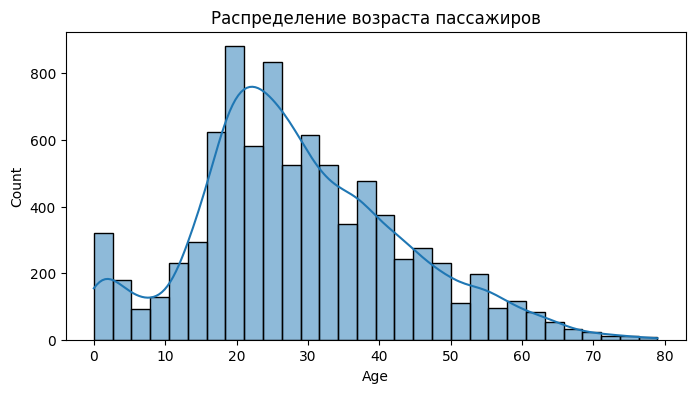

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Распределение возраста пассажиров")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [17]:
age = df['Age'].dropna()
stat, p = stats.shapiro(age)
print(f"Статистика Шапиро-Уилка = {stat:.4f}, p-value = {p:.4f}")

if p > 0.05:
    print("Не отвергаем H0: данные примерно нормальны")
else:
    print("Отвергаем H0: данные не нормальны")

Статистика Шапиро-Уилка = 0.9809, p-value = 0.0000
Отвергаем H0: данные не нормальны


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8514.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Описание файлов и полей данных

**train.csv** — Личные записи примерно двух третей (8693) пассажиров, предназначенные для обучения модели.  
**PassengerId** — Уникальный идентификатор каждого пассажира. Каждый идентификатор имеет форму gggg_pp, где gggg обозначает группу, с которой путешествует пассажир, а pp — его номер внутри группы. Люди в одной группе часто являются членами семьи, но не всегда.  
**HomePlanet** — Планета, с которой отправился пассажир, обычно его планета постоянного проживания.  
**CryoSleep** — Указывает, выбрал ли пассажир криосон на время путешествия. Пассажиры в криосне находятся в своих каютах.  
**Cabin** — Номер каюты, где размещён пассажир. Имеет формат deck/num/side, где side может быть P (Port — левый борт) или S (Starboard — правый борт).  
**Destination** — Планета, на которую пассажир должен был высадиться.  
**Age** — Возраст пассажира.  
**VIP** — Указывает, оплатил ли пассажир специальные VIP-услуги во время путешествия.  
**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** — Суммы, начисленные пассажиром за использование различных роскошных сервисов на борту «Космического Титаника».  
**Name** — Имя и фамилия пассажира.  
**Transported** — Был ли пассажир перемещён в другое измерение. Это целевая переменная, которую требуется предсказать.


In [25]:
missing = df.isnull().sum()
print(missing[missing > 0])

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [4]:
(df.isna().mean()*100).round(2)

,0
PassengerId,0.00
HomePlanet,2.31
CryoSleep,2.50
Cabin,2.29
Destination,2.09
Age,2.06
VIP,2.34
RoomService,2.08
FoodCourt,2.11
ShoppingMall,2.39


HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64


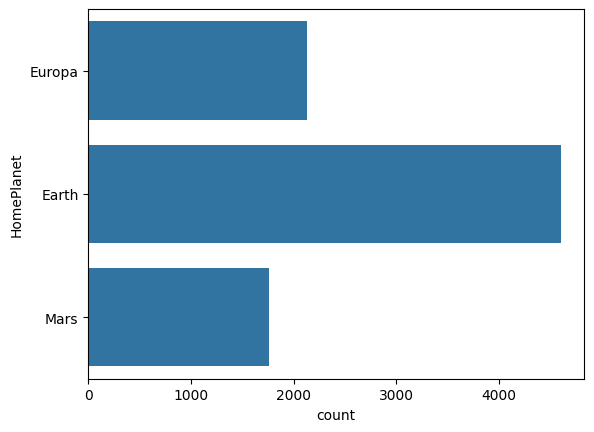

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64


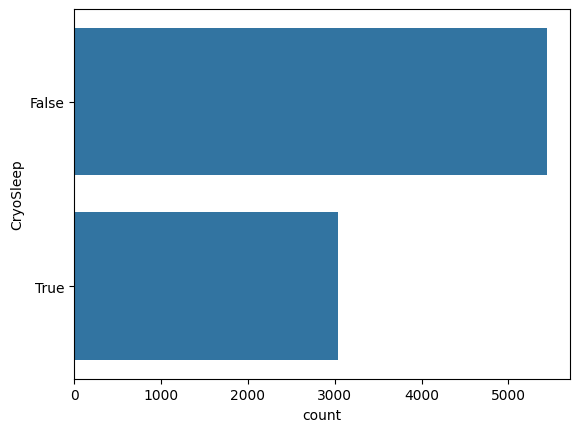

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64


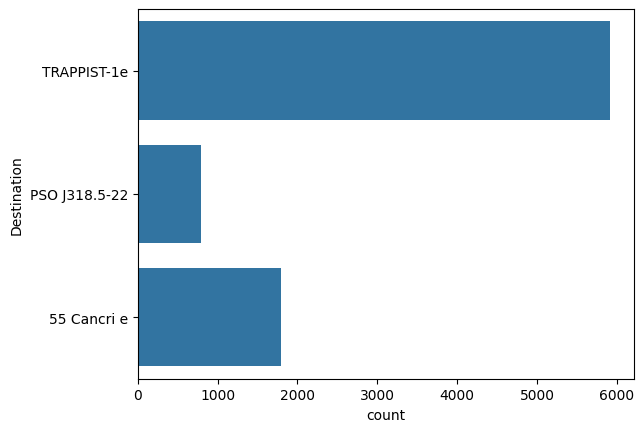

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64


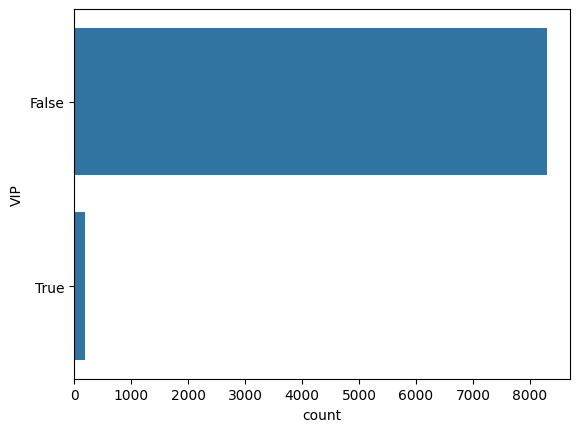

In [6]:
for col in ['HomePlanet','CryoSleep','Destination','VIP']:
    print(df[col].value_counts(dropna=False))
    sns.countplot(y=col, data=df)
    plt.show()

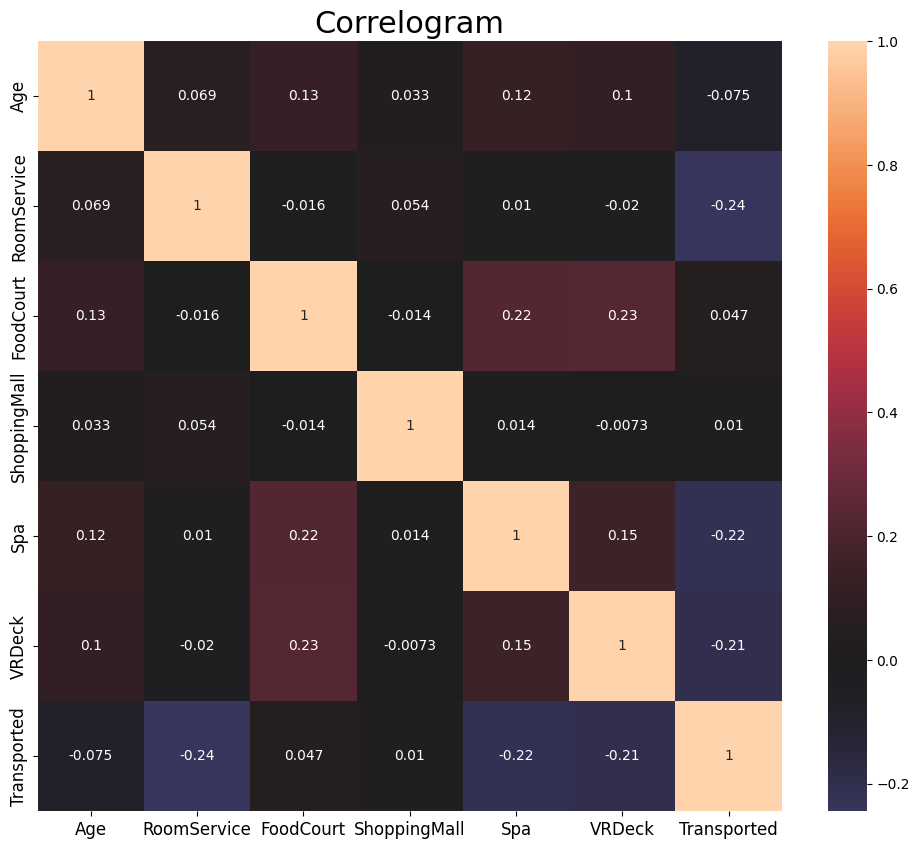

In [7]:
plt.figure(figsize=(12,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='icefire', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Гипотеза №1

## Постановка задачи

Необходимо проверить гипотезу, что **нахождение в криосне не влияет на вероятность перемещения**.

У нас есть набор данных о пассажирах космического корабля, где интересующая переменная — **Transported** булева: True = пассажир перемещён, False = нет.

**Группы:**
  - **Cryo:** пассажиры в криосне
  - **Awake:** пассажиры не в криосне

## Случайная величина

Для каждой группы количество перемещённых пассажиров можно рассматривать как биномиальную случайную величину:

$$X_1 = \text{число перемещённых в Cryo} \sim \text{Binomial}(n_1, p_1)$$  

$$
X_2 = \text{число перемещённых в Awake} \sim \text{Binomial}(n_2, p_2)
$$

**Наблюдаемые величины:** доли успехов в каждой группе:  
$$
\hat{p}_1 = X_1 / n_1, \quad \hat{p}_2 = X_2 / n_2
$$

> Для бинарных данных среднее $\bar{X}$ выборки совпадает с долей успехов $\hat{p}$

## Формулировка гипотезы
**Проверяемая гипотеза**  
$H_0: p_1 = p_2$  

(пассажиры в криосне и бодрствующие имеют одинаковую вероятность перемещения)

**Альтернативная гипотеза**  
$H_1: p_1 > p_2$

(пассажиры в криосне перемещаются чаще)

## Выбор статистики

Мы используем **Z-статистику**, так как:

- Выборки достаточно большие (n₁ и n₂ > 30)
- Дисперсия может быть оценена из биномиального распределения:  $\text{D}(\hat{p}_i) = \frac{p_i (1-p_i)}{n_i}$

Стандартная ошибка разности долей:

$$
SE = \sqrt{\text{D}(\hat{p}_1 - \hat{p}_2)} = \sqrt{p_\text{combined}(1-p_\text{combined}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)},
$$

где $p_\text{combined} = \frac{X_1 + X_2}{n_1 + n_2}$ — объединённая доля перемещённых, предполагаемая H₀

**Формула Z-статистики**

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{SE} =
\frac{\hat{p}_1 - \hat{p}_2}{\sqrt{p_\text{combined}(1-p_\text{combined}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$

> Формула получена из стандартной Z-статистики для среднего:  
> $$
> Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
> $$

## Уровень значимости
Для проверки статистической значимости принят **α = 0.05** (5%).

In [11]:
df = df.dropna(subset=["CryoSleep", "Transported"])

cryo = df[df["CryoSleep"] == True]["Transported"]
awake = df[df["CryoSleep"] == False]["Transported"]

# Выборочные доли
p1 = cryo.mean()
p2 = awake.mean()

n1 = len(cryo)
n2 = len(awake)

print(f"p1 (CryoSleep) = {p1:.3f}, n1 = {n1}")
print(f"p2 (Awake)     = {p2:.3f}, n2 = {n2}")

# Объединённая доля (при H0)
p_comb = (p1 * n1 + p2 * n2) / (n1 + n2)

# Статистика Z
Z = (p1 - p2) / np.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))
print(f"Z = {Z:.3f}")

# Уровень значимости
alpha = 0.05

# Критическая область для односторонней гипотезы H1: p1 > p2
Z_crit = stats.norm.ppf(1 - alpha)
print(f"Критическая область: Z > {Z_crit:.3f}")

# p-value
p_value = 1 - stats.norm.cdf(Z)
print(f"p-value = {p_value:.4f}")

# Вывод
if Z > Z_crit:
    print("Отвергаем H₀: пассажиры в криосне ЧАЩЕ подвергались переносу (различие значимо).")
else:
    print("Принимаем H₀: статистически значимых различий не обнаружено.")


p1 (CryoSleep) = 0.818, n1 = 3037
p2 (Awake)     = 0.329, n2 = 5439
Z = 43.146
Критическая область: Z > 1.645
p-value = 0.0000
Отвергаем H₀: пассажиры в криосне ЧАЩЕ подвергались переносу (различие значимо).


## Результат
По данным обучающей выборки (n = 8476), доля перемещённых среди пассажиров без криосна составила 32,9%,
а среди пассажиров с криосном — 81,8%.
Z значительно больше критического значения, а p-value практически равна 0.

Следовательно, **отвергаем H₀**: пассажиры, находящиеся в криосне, статистически значимо чаще подвергались переносу.

# Гипотеза №2

## Постановка задачи

Необходимо проверить, есть ли статистические доказательства того, что **VIP-пассажиры тратят больше на роскошные сервисы на борту «Космического Титаника», чем пассажиры без VIP-статуса**.

**Группы:**

- **VIP-пассажиры** (`VIP = True`)  
- **Не-VIP пассажиры** (`VIP = False`)



## Cлучайная величина

Рассматриваем **суммарные расходы одного пассажира на все сервисы**:

$$
X_i = \text{RoomService}_i + \text{FoodCourt}_i + \text{ShoppingMall}_i + \text{Spa}_i + \text{VRDeck}_i
$$

## Формулировка гипотезы

**Проверяемая гипотеза**

$H_0: \mu_\text{VIP} \ge \mu_\text{non-VIP}$

(средние расходы VIP **больше или равны**, чем у не-VIP)

**Альтернативная гипотеза**

$H_1: \mu_\text{VIP} < \mu_\text{non-VIP}$

(средние расходы VIP **меньше**, чем у не-VIP)


## Выбор статистики

Мы используем **t-статистику**, так как:

- Сравниваем средние значения количественной переменной (суммарные расходы) между двумя независимыми группами: VIP и не-VIP  
- Выборки могут быть неравными и иметь различную дисперсию

**Стандартная ошибка разности средних:**

$$
SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}},
$$

где $s_1^2, s_2^2$ — выборочные дисперсии расходов в группах $X_1$(VIP) и $X_2$(не-VIP), $n_1, n_2$ — размеры выборок.
> $
> s_i^2 = \frac{1}{n_i - 1} \sum_{i=1}^{n_i} (X_i - \bar{X}_1)^2
> $

**Формула t-статистики:**

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{SE} = \frac{\bar{X}_\text{VIP} - \bar{X}_\text{non-VIP}}{\sqrt{\frac{s_\text{VIP}^2}{n_\text{VIP}} + \frac{s_\text{non-VIP}^2}{n_\text{non-VIP}}}}
$$

> Формула получена из стандартной t-статистики для двух независимых выборок:  
> $$
> t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}
> $$
> Здесь числитель — разница наблюдаемых средних, а знаменатель — стандартная ошибка разности средних.


## Уровень значимости
Для проверки статистической значимости принят **α = 0.05** (5%).

In [27]:
df['TotalSpend'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

X1 = df[df['VIP'] == True]['TotalSpend'].dropna()
X2 = df[df['VIP'] == False]['TotalSpend'].dropna()

n1 = len(X1)
n2 = len(X2)

# Средние значения
mean1 = X1.mean()
mean2 = X2.mean()

# Несмещённые дисперсии
s1_sq = X1.var(ddof=1)
s2_sq = X2.var(ddof=1)

# Стандартная ошибка разности средних
SE = np.sqrt(s1_sq / n1 + s2_sq / n2)

# t-статистика
t_stat = (mean1 - mean2) / SE

# Степени свободы по формуле Уэлча
df_welch = (s1_sq/n1 + s2_sq/n2)**2 / ((s1_sq/n1)**2/(n1-1) + (s2_sq/n2)**2/(n2-1))

# Одностороннее p-value
p_value_one_sided = stats.t.cdf(t_stat, df=df_welch)

# Вывод
print(f"t-статистика = {t_stat:.3f}")
print(f"p-value (односторонний) = {p_value_one_sided:.4f}")
alpha = 0.05
if p_value_one_sided < alpha:
    print("Отвергаем H0: VIP пассажиры статистически значимо тратят меньше.")
else:
    print("Не отвергаем H0: статистически значимых различий не обнаружено.")


t-статистика = 8.129
p-value (односторонний) = 1.0000
Не отвергаем H0: статистически значимых различий не обнаружено.


## Результат

Принимаем H₀: статистически значимых различий между расходами VIP и не-VIP пассажиров не обнаружено.


# Гипотеза №3

## Постановка задачи

Необходимо проверить, есть ли зависимость между **планетой отправления** пассажира и **планетой назначения**.

**Категориальные признаки:**
  - **HomePlanet** — планета, с которой отправился пассажир  
  - **Destination** — планета, на которую пассажир должен был высадиться

## Случайная величина

Случайная величина — **количество пассажиров**, попавших в каждую комбинацию HomePlanet × Destination.

Таблица сопряжённости (contingency table) используется для расчёта χ²-статистики.

## Формулировка гипотезы

**Проверяемая гипотеза**  

$H_0$: Планета отправления **не влияет** на планету
назначения

(признаки независимы)

**Альтернативная гипотеза**

$H_1$: Планета отправления **влияет** на планету назначения

(признаки зависимы)

## Выбор статистики

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

- O — наблюдаемое количество пассажиров в каждой ячейке таблицы  
- E — ожидаемое количество при условии независимости признаков


## Уровень значимости

Для проверки статистической значимости принят α = 0.05 (5%).

In [28]:
# Таблица сопряжённости
observed = pd.crosstab(df['HomePlanet'], df['Destination'])
print("Наблюдаемые значения (O):")
print(observed)

# Общее количество пассажиров
N = observed.values.sum()

# Суммы по строкам и столбцам
row_sums = observed.sum(axis=1).values.reshape(-1, 1)
col_sums = observed.sum(axis=0).values.reshape(1, -1)

# Вычисляем ожидаемые значения при H0
expected = row_sums @ col_sums / N
print("\nОжидаемые значения (E):")
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))

# Вычисляем χ²-статистику
chi2_stat = np.sum((observed.values - expected)**2 / expected)
print(f"\nχ²-статистика = {chi2_stat:.3f}")

# Степени свободы
df_chi2 = (observed.shape[0] - 1) * (observed.shape[1] - 1)
print(f"Степени свободы = {df_chi2}")

# p-value
from scipy.stats import chi2
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)
print(f"p-value = {p_value:.4f}")

# Вывод
alpha = 0.05
if p_value < alpha:
    print("\nОтвергаем H0: существует зависимость между HomePlanet и Destination.")
else:
    print("\nНе отвергаем H0: статистически значимой зависимости не обнаружено.")


Наблюдаемые значения (O):
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth                677            695         3018
Europa               861             19         1158
Mars                 188             47         1440

Ожидаемые значения (E):
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth         935.103048     412.290510  3042.606442
Europa        434.109342     191.400469  1412.490189
Mars          356.787610     157.309021  1160.903369

χ²-статистика = 1110.524
Степени свободы = 4
p-value = 0.0000

Отвергаем H0: существует зависимость между HomePlanet и Destination.


## Результат

Отвергаем H₀: существует **статистически значимая зависимость** между планетой отправления (HomePlanet) и планетой назначения (Destination).  

Значит, пассажиры с определённой планеты чаще летят на конкретную планету, а не случайно(выбор Destination зависит от HomePlanet).